# はじめに
## Pyhackとは？
正式名称：Python mini-Hack-a-thon
* https://pyhack.connpass.com/

第1回（2010年9月25日）の説明：

> 2009年の6月からZope/Ploneの開発者で集まってもくもくと開発したり色々相談したりとかやっていたんですが、全然Zope/Ploneに限定したことをやっていない気がしてきたので、試しに名前を変えてみました。スプリントのゆるい版みたいな感じで各自自分でやりたいことを持ってきて、勝手に開発を進めています。参加費は無料です。


第100回（2019年6月22日）の説明：

> 基本的に毎月開催です。スプリントのゆるい版みたいな感じで各自自分でやりたいことを持ってきて、勝手に開発を進めています。参加費は無料です。初めての方も常連さんもぜひご参加ください。

参加者のバックグランドはweb開発からデータ分析、機械学習まで幅広く、レベルも初心者から猛者まで様々。上の説明にもあるように、各自が「もくもく」と自習したり開発したりする会。言語の縛りはないが、Pythonで何かする人が多い。1日の終わりに成果発表LTがあり、毎回楽しい。2019年6月22日（土）に100回目を迎えた。

以下では、その100回の歴史をデータから振り返る。なお、2019年6月22日の第100回にて「もくもく」した成果にコメントやコードを追加しリファクタリングしたものである。

* [https://github.com/ytknzw/Python-mini-Hack-a-thon/blob/master/Pyhack100thAniv.ipynb](https://github.com/ytknzw/Python-mini-Hack-a-thon/blob/master/Pyhack100thAniv.ipynb)

# ライブラリ読込

In [1]:
import requests
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone

In [2]:
%matplotlib inline

# データ取得

## ATNDのAPI
* https://api.atnd.org/#events-que-sample

現在はconnpassだが、第12回まではATNDにて募集されていた。「Python mini Hack-a-thon」というキーワードと主催者名「takanori」を指定して検索してみる。

In [3]:
res_atnd = requests.get('http://api.atnd.org/events/?keyword=Python,mini,Hack-a-thon&owner_nickname=takanori&count=100&format=json')

In [4]:
res_atnd.status_code

200

In [5]:
res_atnd_dict = json.loads(res_atnd.text)
#res_atnd_dict

検索結果は過不足ないようなので、pandasのDataFrameに加工する。

In [6]:
pyhack_atnd = pd.DataFrame()
for i, e in enumerate(res_atnd_dict['events']):
    pyhack_atnd = pd.concat([pyhack_atnd, pd.DataFrame(e['event'], index=['event_id'])])
i

11

加工結果を確認する。

In [7]:
pyhack_atnd.head()

,event_id,title,catch,description,event_url,started_at,ended_at,url,limit,address,place,lat,lon,owner_id,owner_nickname,owner_twitter_id,accepted,waiting,updated_at
event_id,20091,(第12回)Python mini Hack-a-thon,平安遷都の日,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,http://atnd.org/events/20091,2011-10-22T11:00:00.000+09:00,2011-10-22T19:00:00.000+09:00,http://www.facebook.com/event.php?eid=19334923...,30,東京都新宿区西新宿4丁目15番7号,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),35.6889375,139.6882207,5173,takanori,takanory,23,0,2011-10-14T11:18:21.000+09:00
event_id,17896,(第11回)Python mini Hack-a-thon,モノレール開業記念日,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,http://atnd.org/events/17896,2011-09-17T11:00:00.000+09:00,2011-09-17T19:00:00.000+09:00,https://www.facebook.com/event.php?eid=1298972...,30,東京都新宿区西新宿4丁目15番7号,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),35.6889375,139.6882207,5173,takanori,takanory,24,0,2011-07-20T00:00:04.000+09:00
event_id,16923,(第10回)Python mini Hack-a-thon,ジェットコースターの日,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,http://atnd.org/events/16923,2011-07-09T11:00:00.000+09:00,2011-07-09T19:00:00.000+09:00,http://www.facebook.com/event.php?eid=12989727...,30,東京都新宿区西新宿4丁目15番7号,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),35.6889375,139.6882207,5173,takanori,takanory,26,0,2011-06-20T11:16:17.000+09:00
event_id,15877,(第9回)Python mini Hack-a-thon,傘の日,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,http://atnd.org/events/15877,2011-06-11T11:00:00.000+09:00,2011-06-11T19:00:00.000+09:00,None,30,東京都新宿区西新宿4丁目15番7号,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),35.6889375,139.6882207,5173,takanori,takanory,23,0,2011-06-03T23:04:01.000+09:00
event_id,15156,(第8回)Python mini Hack-a-thon,種痘記念日、温度計の日,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,http://atnd.org/events/15156,2011-05-14T11:00:00.000+09:00,2011-05-14T19:00:00.000+09:00,None,30,東京都新宿区西新宿4丁目15番7号,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),35.6889375,139.6882207,5173,takanori,takanory,18,0,2011-04-25T12:30:49.000+09:00


In [8]:
pyhack_atnd.title

event_id              (第12回)Python mini Hack-a-thon
event_id              (第11回)Python mini Hack-a-thon
event_id              (第10回)Python mini Hack-a-thon
event_id               (第9回)Python mini Hack-a-thon
event_id               (第8回)Python mini Hack-a-thon
event_id               (第7回)Python mini Hack-a-thon
event_id               (第6回)Python mini Hack-a-thon
event_id    (第5回)Python mini Hack-a-thon(雪山合宿バージョン)
event_id               (第4回)Python mini Hack-a-thon
event_id               (第3回)Python mini Hack-a-thon
event_id               (第2回)Python mini Hack-a-thon
event_id               (第1回)Python mini Hack-a-thon
Name: title, dtype: object

In [9]:
pyhack_atnd.dtypes

event_id             int64
title               object
catch               object
description         object
event_url           object
started_at          object
ended_at            object
url                 object
limit                int64
address             object
place               object
lat                 object
lon                 object
owner_id             int64
owner_nickname      object
owner_twitter_id    object
accepted             int64
waiting              int64
updated_at          object
dtype: object

In [10]:
pyhack_atnd.describe(include='all')

,event_id,title,catch,description,event_url,started_at,ended_at,url,limit,address,place,lat,lon,owner_id,owner_nickname,owner_twitter_id,accepted,waiting,updated_at
count,12.000000,12,12,12,12,12,12,4,12.00000,12,12,12,12,12.0,12,12,12.000000,12.0,12
unique,NaN,12,12,12,12,12,12,4,NaN,3,5,3,3,NaN,1,1,NaN,NaN,12
top,NaN,(第8回)Python mini Hack-a-thon,飛行船の日、ジャズの日、カレーの日,<p>毎月開催しているPython mini Hack-a-thonの合宿バージョンを開催し...,http://atnd.org/events/15156,2011-01-22T11:00:00.000+09:00,2010-09-25T19:00:00.000+09:00,https://www.facebook.com/event.php?eid=1298972...,NaN,東京都新宿区西新宿4丁目15番7号,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),35.6889375,139.6882207,NaN,takanori,takanory,NaN,NaN,2011-03-28T13:54:30.000+09:00
freq,NaN,1,1,1,1,1,1,1,NaN,9,7,9,9,NaN,12,12,NaN,NaN,1
mean,13335.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00000,NaN,NaN,NaN,NaN,5173.0,NaN,NaN,16.583333,0.0,NaN
std,4032.588935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.04534,NaN,NaN,NaN,NaN,0.0,NaN,NaN,8.140341,0.0,NaN
min,7474.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00000,NaN,NaN,NaN,NaN,5173.0,NaN,NaN,0.000000,0.0,NaN
25%,9940.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00000,NaN,NaN,NaN,NaN,5173.0,NaN,NaN,11.250000,0.0,NaN
50%,13495.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00000,NaN,NaN,NaN,NaN,5173.0,NaN,NaN,19.500000,0.0,NaN
75%,16138.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00000,NaN,NaN,NaN,NaN,5173.0,NaN,NaN,23.000000,0.0,NaN


第5回の雪山合宿2011の参加者数が0になっている。関係者によると、この回の募集はこくちーずで行われたとのこと。

In [11]:
pyhack_atnd.loc[pyhack_atnd.accepted == 0,]

,event_id,title,catch,description,event_url,started_at,ended_at,url,limit,address,place,lat,lon,owner_id,owner_nickname,owner_twitter_id,accepted,waiting,updated_at
event_id,11947,(第5回)Python mini Hack-a-thon(雪山合宿バージョン),夕刊紙の日、二・二六事件の日、新選組の日,<p>毎月開催しているPython mini Hack-a-thonの合宿バージョンを開催し...,http://atnd.org/events/11947,2011-02-25T12:00:00.000+09:00,2011-02-27T12:00:00.000+09:00,http://kokucheese.com/event/index/6029/,10,長野県須坂市大字仁礼峰の原高原3153-720,菅平(峰の原) マウンテンパパ(無線LANあり),36.5531173,138.3497436,5173,takanori,takanory,0,0,2011-01-13T20:52:12.000+09:00


### 第5回の雪山合宿2011の参加者数をこくちーずの値で補完
* https://kokucheese.com/event/index/6029/

In [12]:
pyhack_atnd.loc[pyhack_atnd.event_id==11947, 'accepted'] = 7

### 全体の出来上がりを目で確認

In [13]:
pyhack_atnd.sort_values('started_at').reset_index(drop=True).head()

,event_id,title,catch,description,event_url,started_at,ended_at,url,limit,address,place,lat,lon,owner_id,owner_nickname,owner_twitter_id,accepted,waiting,updated_at
0,7474,(第1回)Python mini Hack-a-thon,松本楼でチャリティー10円カレーセールの日,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,http://atnd.org/events/7474,2010-09-25T11:00:00.000+09:00,2010-09-25T19:00:00.000+09:00,None,10,台東区浅草橋5-4-5 ハシモトビル7階,Nexedi,35.6995556,139.7807378,5173,takanori,takanory,9,0,2010-09-22T17:35:21.000+09:00
1,8297,(第2回)Python mini Hack-a-thon,霜降、電信電話記念日,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,http://atnd.org/events/8297,2010-10-23T11:00:00.000+09:00,2010-10-23T19:00:00.000+09:00,None,10,台東区浅草橋5-4-5 ハシモトビル7階,Nexedi,35.6995556,139.7807378,5173,takanori,takanory,7,0,2010-10-11T15:24:01.000+09:00
2,9179,(第3回)Python mini Hack-a-thon,世界の子どもの日、毛皮の日(いいファー)、えびす講、ピザの日,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,http://atnd.org/events/9179,2010-11-20T11:00:00.000+09:00,2010-11-20T19:00:00.000+09:00,None,30,東京都新宿区西新宿4丁目15番7号,株式会社gumi 大会議室(パシフィックマークス新宿パークサイド7階),35.6889375,139.6882207,5173,takanori,takanory,14,0,2010-11-14T02:46:06.000+09:00
3,10194,(第4回)Python mini Hack-a-thon,飛行船の日、ジャズの日、カレーの日,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,http://atnd.org/events/10194,2011-01-22T11:00:00.000+09:00,2011-01-22T19:00:00.000+09:00,None,30,東京都新宿区西新宿4丁目15番7号,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),35.6889375,139.6882207,5173,takanori,takanory,12,0,2011-01-19T14:04:08.000+09:00
4,11947,(第5回)Python mini Hack-a-thon(雪山合宿バージョン),夕刊紙の日、二・二六事件の日、新選組の日,<p>毎月開催しているPython mini Hack-a-thonの合宿バージョンを開催し...,http://atnd.org/events/11947,2011-02-25T12:00:00.000+09:00,2011-02-27T12:00:00.000+09:00,http://kokucheese.com/event/index/6029/,10,長野県須坂市大字仁礼峰の原高原3153-720,菅平(峰の原) マウンテンパパ(無線LANあり),36.5531173,138.3497436,5173,takanori,takanory,7,0,2011-01-13T20:52:12.000+09:00


## connpassのAPI
* https://connpass.com/about/api/

第13回以降。試行錯誤の結果「python mini Hack-a-thon」というキーワードとグループID「14」を指定して検索すると漏れがない。

In [14]:
res_cnps = requests.get('https://connpass.com/api/v1/event/?keyword=Python,mini,Hack-a-thon&series_id=14&count=1000')

In [15]:
res_cnps.status_code

200

In [16]:
res_cnps_dict = json.loads(res_cnps.text)
#res_cnps_dict

ATNDのデータと同様にpandasのDataFrameに加工する。

In [17]:
pyhack_cnps_org = pd.DataFrame()
for i, e in enumerate(res_cnps_dict['events']):
    pyhack_cnps_org = pd.concat([pyhack_cnps_org, pd.DataFrame(e)])
i

97

In [18]:
pyhack_cnps_org.head()

,event_url,event_type,owner_nickname,series,updated_at,lat,started_at,hash_tag,title,event_id,...,waiting,limit,owner_id,owner_display_name,description,address,catch,accepted,ended_at,place
id,https://pyhack.connpass.com/event/138721/,participation,takanori,14,2019-07-08T14:15:09+09:00,35.686435500000,2019-08-10T11:00:00+09:00,pyhack,(第102回)Python mini Hack-a-thon,138721,...,5,20,51,Takanori Suzuki,<h2>この勉強会について</h2>\n<p>基本的に毎月開催です。スプリントのゆるい版みた...,渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,焼き鳥の日,18,2019-08-10T19:00:00+09:00,ビープラウド会議室
title,https://pyhack.connpass.com/event/138721/,participation,takanori,Python mini Hack-a-thon,2019-07-08T14:15:09+09:00,35.686435500000,2019-08-10T11:00:00+09:00,pyhack,(第102回)Python mini Hack-a-thon,138721,...,5,20,51,Takanori Suzuki,<h2>この勉強会について</h2>\n<p>基本的に毎月開催です。スプリントのゆるい版みた...,渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,焼き鳥の日,18,2019-08-10T19:00:00+09:00,ビープラウド会議室
url,https://pyhack.connpass.com/event/138721/,participation,takanori,https://pyhack.connpass.com/,2019-07-08T14:15:09+09:00,35.686435500000,2019-08-10T11:00:00+09:00,pyhack,(第102回)Python mini Hack-a-thon,138721,...,5,20,51,Takanori Suzuki,<h2>この勉強会について</h2>\n<p>基本的に毎月開催です。スプリントのゆるい版みた...,渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,焼き鳥の日,18,2019-08-10T19:00:00+09:00,ビープラウド会議室
id,https://pyhack.connpass.com/event/120809/,participation,takanori,14,2019-07-04T11:47:28+09:00,36.553117300000,2019-07-12T13:00:00+09:00,pyhack,Python mini hack-a-thon 夏山合宿 2019,120809,...,0,28,51,Takanori Suzuki,<h2>このイベントについて</h2>\n<p>毎年夏、冬に行っている、Python min...,長野県須坂市大字仁礼峰の原高原3153-720,人間ドックの日、日本標準時制定記念日、ひまわりの日、ファミコンの日,28,2019-07-15T14:00:00+09:00,ペンション マウンテンパパ
title,https://pyhack.connpass.com/event/120809/,participation,takanori,Python mini Hack-a-thon,2019-07-04T11:47:28+09:00,36.553117300000,2019-07-12T13:00:00+09:00,pyhack,Python mini hack-a-thon 夏山合宿 2019,120809,...,0,28,51,Takanori Suzuki,<h2>このイベントについて</h2>\n<p>毎年夏、冬に行っている、Python min...,長野県須坂市大字仁礼峰の原高原3153-720,人間ドックの日、日本標準時制定記念日、ひまわりの日、ファミコンの日,28,2019-07-15T14:00:00+09:00,ペンション マウンテンパパ


In [19]:
pyhack_cnps_org.title

id          (第102回)Python mini Hack-a-thon
title       (第102回)Python mini Hack-a-thon
url         (第102回)Python mini Hack-a-thon
id       Python mini hack-a-thon 夏山合宿 2019
title    Python mini hack-a-thon 夏山合宿 2019
url      Python mini hack-a-thon 夏山合宿 2019
id          (第100回)Python mini Hack-a-thon
title       (第100回)Python mini Hack-a-thon
url         (第100回)Python mini Hack-a-thon
id           (第99回)Python mini Hack-a-thon
title        (第99回)Python mini Hack-a-thon
url          (第99回)Python mini Hack-a-thon
id           (第98回)Python mini Hack-a-thon
title        (第98回)Python mini Hack-a-thon
url          (第98回)Python mini Hack-a-thon
id           (第97回)Python mini Hack-a-thon
title        (第97回)Python mini Hack-a-thon
url          (第97回)Python mini Hack-a-thon
id           (第96回)Python mini Hack-a-thon
title        (第96回)Python mini Hack-a-thon
url          (第96回)Python mini Hack-a-thon
id       Python mini hack-a-thon 雪山合宿 2019
title    Python mini hack-a-thon 雪山合宿 2019
url      Py

In [20]:
pyhack_cnps_org.dtypes

event_url             object
event_type            object
owner_nickname        object
series                object
updated_at            object
lat                   object
started_at            object
hash_tag              object
title                 object
event_id               int64
lon                   object
waiting                int64
limit                  int64
owner_id               int64
owner_display_name    object
description           object
address               object
catch                 object
accepted               int64
ended_at              object
place                 object
dtype: object

加工時に発生した重複行（```series```が原因）とPyHack以外のイベントを除く。

ちなみに、もくもく会は「Python mini __H__ack-a-thon」、合宿は「Python mini **h**ack-a-thon」と表記揺れがある（Hackとhack）。

In [21]:
pyhack_cnps = pyhack_cnps_org.loc[(pyhack_cnps_org.series==14) &
                                  (pyhack_cnps_org.hash_tag == 'pyhack') &
                                  pyhack_cnps_org.title.apply(lambda x: re.search('Python mini (H|h)ack-a-thon', x) != None)]\
                             .sort_values('started_at').reset_index(drop=True)
pyhack_cnps.head()

,event_url,event_type,owner_nickname,series,updated_at,lat,started_at,hash_tag,title,event_id,...,waiting,limit,owner_id,owner_display_name,description,address,catch,accepted,ended_at,place
0,https://pyhack.connpass.com/event/51/,participation,takanori,14,2014-06-30T10:06:17+09:00,35.666164600000,2011-11-26T11:00:57+09:00,pyhack,(第13回)Python mini Hack-a-thon,51,...,0,30,51,Takanori Suzuki,"<h2><font size=""4"">この勉強会について</font></h2><br />...",東京都港区虎ノ門3-4-7 虎ノ門36森ビル 7階,ペンの日、いい風呂の日,26,2011-11-26T19:00:57+09:00,アリエル・ネットワーク 会議室
1,https://pyhack.connpass.com/event/141/,participation,takanori,14,2014-06-30T10:06:17+09:00,35.666164600000,2011-12-17T11:00:00+09:00,pyhack,(第14回)Python mini Hack-a-thon,141,...,0,30,51,Takanori Suzuki,"<h2><font size=""4"">この勉強会について</font></h2>基本的に毎月...",東京都港区虎ノ門3-4-7 虎ノ門36森ビル 7階,将棋の日、蓮根の日,24,2011-12-17T19:00:00+09:00,アリエル・ネットワーク 会議室
2,https://pyhack.connpass.com/event/196/,participation,takanori,14,2014-06-30T10:06:18+09:00,35.666164600000,2012-01-21T11:00:00+09:00,pyhack,(第15回)Python mini Hack-a-thon,196,...,0,30,51,Takanori Suzuki,"<h2><font size=""4"">この勉強会について</font></h2>基本的に毎月...",東京都港区虎ノ門3-4-7 虎ノ門36森ビル 7階,大寒、ライバルが手を結ぶ日,26,2012-01-21T19:00:00+09:00,アリエル・ネットワーク 会議室
3,https://pyhack.connpass.com/event/74/,participation,takanori,14,2014-10-16T13:30:05+09:00,36.553117300000,2012-02-03T13:00:40+09:00,pyhack,Python mini hack-a-thon 雪山合宿 2012,74,...,0,13,51,Takanori Suzuki,<p>毎月行っている、Python mini \nHack-a-thon(旧Zope/Plo...,長野県須坂市大字仁礼峰の原高原3153-720,節分、立春、笑顔の日,13,2012-02-05T11:00:40+09:00,ペンション マウンテンパパ
4,https://pyhack.connpass.com/event/279/,participation,takanori,14,2014-06-30T10:06:18+09:00,35.666164600000,2012-03-24T11:00:00+09:00,pyhack,(第17回)Python mini Hack-a-thon,279,...,0,30,51,Takanori Suzuki,"<h2><font size=""4"">この勉強会について</font></h2>基本的に毎月...",東京都港区虎ノ門3-4-7 虎ノ門36森ビル 7階,檸檬忌,28,2012-03-24T19:00:00+09:00,アリエル・ネットワーク 会議室


確認のため、イベントのタイトルを表示してみる。

In [22]:
pyhack_cnps.title

0         (第13回)Python mini Hack-a-thon
1         (第14回)Python mini Hack-a-thon
2         (第15回)Python mini Hack-a-thon
3     Python mini hack-a-thon 雪山合宿 2012
4         (第17回)Python mini Hack-a-thon
5         (第18回)Python mini Hack-a-thon
6         (第19回)Python mini Hack-a-thon
7         (第20回)Python mini Hack-a-thon
8         (第21回)Python mini Hack-a-thon
9         (第22回)Python mini Hack-a-thon
10    Python mini hack-a-thon 夏山合宿 2012
11        (第24回)Python mini Hack-a-thon
12        (第25回)Python mini Hack-a-thon
13        (第26回)Python mini Hack-a-thon
14    Python mini hack-a-thon 雪山合宿 2013
15        (第28回)Python mini Hack-a-thon
16        (第29回)Python mini Hack-a-thon
17        (第30回)Python mini Hack-a-thon
18        (第31回)Python mini Hack-a-thon
19        (第32回)Python mini Hack-a-thon
20        (第33回)Python mini Hack-a-thon
21        (第34回)Python mini Hack-a-thon
22    Python mini hack-a-thon 夏山合宿 2013
23        (第36回)Python mini Hack-a-thon
24        (第37回)Python mini Hack-a-thon


各カラムの概要を確認する。

In [23]:
pyhack_cnps.describe(include='all')

,event_url,event_type,owner_nickname,series,updated_at,lat,started_at,hash_tag,title,event_id,...,waiting,limit,owner_id,owner_display_name,description,address,catch,accepted,ended_at,place
count,90,90,90,90.0,90,90,90,90,90,90.000000,...,90.000000,90.000000,90.0,90,90,90,90,90.000000,90,90
unique,90,1,1,1.0,88,8,90,1,90,NaN,...,NaN,NaN,NaN,1,85,9,88,NaN,90,7
top,https://pyhack.connpass.com/event/121114/,participation,takanori,14.0,2014-06-30T10:06:17+09:00,35.686435500000,2015-03-28T11:00:00+09:00,pyhack,(第42回)Python mini Hack-a-thon,NaN,...,NaN,NaN,NaN,Takanori Suzuki,"<h2><font size=""4"">この勉強会について</font></h2>基本的に毎月...",渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,世界気象デー,NaN,2015-08-01T19:00:00+09:00,ビープラウド会議室
freq,1,90,90,90.0,2,47,1,90,1,NaN,...,NaN,NaN,NaN,90,3,47,2,NaN,1,53
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36946.922222,...,1.955556,23.055556,51.0,NaN,NaN,NaN,NaN,20.555556,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40600.620184,...,3.144144,4.417435,0.0,NaN,NaN,NaN,NaN,3.375760,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,...,0.000000,13.000000,51.0,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3095.750000,...,0.000000,20.000000,51.0,NaN,NaN,NaN,NaN,20.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18729.500000,...,0.000000,20.000000,51.0,NaN,NaN,NaN,NaN,20.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63054.500000,...,3.000000,27.750000,51.0,NaN,NaN,NaN,NaN,21.000000,NaN,NaN


# データ結合

APIの仕様書だけでなく、加工後のデータのカラム名も比較する（APIの仕様書を比べて、名前が同じ変数はデータ内容も同じであることは確認済み）。

In [24]:
pyhack_atnd.columns

Index(['event_id', 'title', 'catch', 'description', 'event_url', 'started_at',
       'ended_at', 'url', 'limit', 'address', 'place', 'lat', 'lon',
       'owner_id', 'owner_nickname', 'owner_twitter_id', 'accepted', 'waiting',
       'updated_at'],
      dtype='object')

In [25]:
pyhack_cnps.columns

Index(['event_url', 'event_type', 'owner_nickname', 'series', 'updated_at',
       'lat', 'started_at', 'hash_tag', 'title', 'event_id', 'lon', 'waiting',
       'limit', 'owner_id', 'owner_display_name', 'description', 'address',
       'catch', 'accepted', 'ended_at', 'place'],
      dtype='object')

共通するものを抽出し、それらだけを残す。

In [26]:
cols = pyhack_cnps.columns[[x in pyhack_atnd.columns.to_list() for x in pyhack_cnps.columns.to_list()]].to_list()
cols

['event_url',
 'owner_nickname',
 'updated_at',
 'lat',
 'started_at',
 'title',
 'event_id',
 'lon',
 'waiting',
 'limit',
 'owner_id',
 'description',
 'address',
 'catch',
 'accepted',
 'ended_at',
 'place']

In [27]:
pyhack_all = pd.concat([pyhack_atnd.loc[:, cols], pyhack_cnps.loc[:, cols]])\
                      .sort_values('started_at').reset_index(drop=True)

結合結果を確認する。

In [28]:
pyhack_all.head()

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,owner_id,description,address,catch,accepted,ended_at,place
0,http://atnd.org/events/7474,takanori,2010-09-22T17:35:21.000+09:00,35.6995556,2010-09-25T11:00:00.000+09:00,(第1回)Python mini Hack-a-thon,7474,139.7807378,0,10,5173,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,台東区浅草橋5-4-5 ハシモトビル7階,松本楼でチャリティー10円カレーセールの日,9,2010-09-25T19:00:00.000+09:00,Nexedi
1,http://atnd.org/events/8297,takanori,2010-10-11T15:24:01.000+09:00,35.6995556,2010-10-23T11:00:00.000+09:00,(第2回)Python mini Hack-a-thon,8297,139.7807378,0,10,5173,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,台東区浅草橋5-4-5 ハシモトビル7階,霜降、電信電話記念日,7,2010-10-23T19:00:00.000+09:00,Nexedi
2,http://atnd.org/events/9179,takanori,2010-11-14T02:46:06.000+09:00,35.6889375,2010-11-20T11:00:00.000+09:00,(第3回)Python mini Hack-a-thon,9179,139.6882207,0,30,5173,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,東京都新宿区西新宿4丁目15番7号,世界の子どもの日、毛皮の日(いいファー)、えびす講、ピザの日,14,2010-11-20T19:00:00.000+09:00,株式会社gumi 大会議室(パシフィックマークス新宿パークサイド7階)
3,http://atnd.org/events/10194,takanori,2011-01-19T14:04:08.000+09:00,35.6889375,2011-01-22T11:00:00.000+09:00,(第4回)Python mini Hack-a-thon,10194,139.6882207,0,30,5173,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,東京都新宿区西新宿4丁目15番7号,飛行船の日、ジャズの日、カレーの日,12,2011-01-22T19:00:00.000+09:00,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階)
4,http://atnd.org/events/11947,takanori,2011-01-13T20:52:12.000+09:00,36.5531173,2011-02-25T12:00:00.000+09:00,(第5回)Python mini Hack-a-thon(雪山合宿バージョン),11947,138.3497436,0,10,5173,<p>毎月開催しているPython mini Hack-a-thonの合宿バージョンを開催し...,長野県須坂市大字仁礼峰の原高原3153-720,夕刊紙の日、二・二六事件の日、新選組の日,7,2011-02-27T12:00:00.000+09:00,菅平(峰の原) マウンテンパパ(無線LANあり)


In [29]:
pyhack_all.dtypes

event_url         object
owner_nickname    object
updated_at        object
lat               object
started_at        object
title             object
event_id           int64
lon               object
waiting            int64
limit              int64
owner_id           int64
description       object
address           object
catch             object
accepted           int64
ended_at          object
place             object
dtype: object

In [30]:
pyhack_all.describe(include='all')

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,owner_id,description,address,catch,accepted,ended_at,place
count,102,102,102,102,102,102,102.000000,102,102.000000,102.000000,102.000000,102,102,102,102.000000,102,102
unique,102,1,100,11,102,102,NaN,11,NaN,NaN,NaN,97,11,99,NaN,102,12
top,https://pyhack.connpass.com/event/55337/,takanori,2014-06-30T10:06:18+09:00,35.686435500000,2015-03-28T11:00:00+09:00,Python mini hack-a-thon 夏山合宿 2013,NaN,139.703531200000,NaN,NaN,NaN,"<h2><font size=""4"">この勉強会について</font></h2>基本的に毎月...",渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,ジェットコースターの日,NaN,2015-08-01T19:00:00+09:00,ビープラウド会議室
freq,1,102,2,47,1,1,NaN,47,NaN,NaN,NaN,3,47,2,NaN,1,53
mean,NaN,NaN,NaN,NaN,NaN,NaN,34169.088235,NaN,1.725490,23.284314,653.588235,NaN,NaN,NaN,20.156863,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,38894.426559,NaN,3.018612,5.148060,1658.405308,NaN,NaN,NaN,4.075391,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,NaN,0.000000,10.000000,51.000000,NaN,NaN,NaN,7.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3842.750000,NaN,0.000000,20.000000,51.000000,NaN,NaN,NaN,19.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,15082.000000,NaN,0.000000,20.000000,51.000000,NaN,NaN,NaN,20.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,55336.500000,NaN,2.000000,30.000000,51.000000,NaN,NaN,NaN,21.000000,NaN,NaN


In [31]:
pyhack_all.title

0                 (第1回)Python mini Hack-a-thon
1                 (第2回)Python mini Hack-a-thon
2                 (第3回)Python mini Hack-a-thon
3                 (第4回)Python mini Hack-a-thon
4      (第5回)Python mini Hack-a-thon(雪山合宿バージョン)
5                 (第6回)Python mini Hack-a-thon
6                 (第7回)Python mini Hack-a-thon
7                 (第8回)Python mini Hack-a-thon
8                 (第9回)Python mini Hack-a-thon
9                (第10回)Python mini Hack-a-thon
10               (第11回)Python mini Hack-a-thon
11               (第12回)Python mini Hack-a-thon
12               (第13回)Python mini Hack-a-thon
13               (第14回)Python mini Hack-a-thon
14               (第15回)Python mini Hack-a-thon
15           Python mini hack-a-thon 雪山合宿 2012
16               (第17回)Python mini Hack-a-thon
17               (第18回)Python mini Hack-a-thon
18               (第19回)Python mini Hack-a-thon
19               (第20回)Python mini Hack-a-thon
20               (第21回)Python mini Hack-a-thon
21           

# データ整形

## 日付
開始日時```started_at```などが文字列になっているのでdatetimeに変換しておく。

In [32]:
# 開始日時（東京時間）
pyhack_all['started_at'] = pd.to_datetime(pyhack_all.started_at, utc=True).dt.tz_convert('Asia/Tokyo')
# 終了日時（東京時間）
pyhack_all['ended_at'] = pd.to_datetime(pyhack_all.ended_at, utc=True).dt.tz_convert('Asia/Tokyo')
# 変更日時（東京時間）
pyhack_all['updated_at'] = pd.to_datetime(pyhack_all.updated_at, utc=True).dt.tz_convert('Asia/Tokyo')

開始日時から年、月、日をそれぞれ切り出す。

In [33]:
pyhack_all['started_at_year'] = pd.to_numeric(pyhack_all.started_at.dt.strftime('%Y'))
pyhack_all['started_at_month'] = pd.to_numeric(pyhack_all.started_at.dt.strftime('%m'))
pyhack_all['started_at_day'] = pd.to_numeric(pyhack_all.started_at.dt.strftime('%d'))

## 期間
データの期間を確認すると、101回目（2019年7月12日からの夏山合宿）以降も含まれている。

In [34]:
min(pyhack_all.started_at)

Timestamp('2010-09-25 11:00:00+0900', tz='Asia/Tokyo')

In [35]:
max(pyhack_all.started_at)

Timestamp('2019-08-10 11:00:00+0900', tz='Asia/Tokyo')

101回目以降（最初の分析時点では未来のイベント）を除く。

In [36]:
# 現在の日時（東京時間）
now = pd.to_datetime(datetime.utcnow(), utc=True).tz_convert('Asia/Tokyo')

日付を指定する場合は以下のようにする。ただし、時刻がUTC（世界標準時 = ロンドンの冬時間）で午前0時（東京では朝9時）になるので、厳密には時刻も指定する方がよい。
```
pd.to_datetime('2019-06-22', utc=True).tz_convert('Asia/Tokyo')
```

In [37]:
pyhack = pyhack_all.loc[pyhack_all.started_at <= now]
pyhack.tail()

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,owner_id,description,address,catch,accepted,ended_at,place,started_at_year,started_at_month,started_at_day
95,https://pyhack.connpass.com/event/117860/,takanori,2019-01-21 14:43:40+09:00,35.686435500000,2019-02-16 11:00:00+09:00,(第96回)Python mini Hack-a-thon,117860,139.703531200000,0,20,51,<h2>この勉強会について</h2>\n<p>基本的に毎月開催です。スプリントのゆるい版みた...,渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,寒天の日,18,2019-02-16 19:00:00+09:00,ビープラウド会議室,2019,2,16
96,https://pyhack.connpass.com/event/121114/,takanori,2019-02-19 10:27:10+09:00,35.686435500000,2019-03-23 11:00:00+09:00,(第97回)Python mini Hack-a-thon,121114,139.703531200000,2,20,51,<h2>この勉強会について</h2>\n<p>基本的に毎月開催です。スプリントのゆるい版みた...,渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,世界気象デー,20,2019-03-23 19:00:00+09:00,ビープラウド会議室,2019,3,23
97,https://pyhack.connpass.com/event/126057/,takanori,2019-03-29 10:43:03+09:00,35.686435500000,2019-04-06 11:00:00+09:00,(第98回)Python mini Hack-a-thon,126057,139.703531200000,0,20,51,<h2>この勉強会について</h2>\n<p>基本的に毎月開催です。スプリントのゆるい版みた...,渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,北極の日,15,2019-04-06 19:00:00+09:00,ビープラウド会議室,2019,4,6
98,https://pyhack.connpass.com/event/127299/,takanori,2019-04-08 17:39:52+09:00,35.686435500000,2019-05-25 11:00:00+09:00,(第99回)Python mini Hack-a-thon,127299,139.703531200000,4,20,51,<h2>この勉強会について</h2>\n<p>基本的に毎月開催です。スプリントのゆるい版みた...,渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,納本制度の日,20,2019-05-25 19:00:00+09:00,ビープラウド会議室,2019,5,25
99,https://pyhack.connpass.com/event/133270/,takanori,2019-06-04 10:27:15+09:00,35.686435500000,2019-06-22 11:00:00+09:00,(第100回)Python mini Hack-a-thon,133270,139.703531200000,12,20,51,<h2>この勉強会について</h2>\n<p>基本的に毎月開催です。スプリントのゆるい版みた...,渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F,かにの日,20,2019-06-22 19:00:00+09:00,ビープラウド会議室,2019,6,22


## 回数
回数を表すカラムを追加する（ほとんどの合宿には回数が明示されていないので）。

In [38]:
pyhack = pyhack.assign(number=pyhack.index + 1)
pyhack.head()

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,description,address,catch,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number
0,http://atnd.org/events/7474,takanori,2010-09-22 17:35:21+09:00,35.6995556,2010-09-25 11:00:00+09:00,(第1回)Python mini Hack-a-thon,7474,139.7807378,0,10,...,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,台東区浅草橋5-4-5 ハシモトビル7階,松本楼でチャリティー10円カレーセールの日,9,2010-09-25 19:00:00+09:00,Nexedi,2010,9,25,1
1,http://atnd.org/events/8297,takanori,2010-10-11 15:24:01+09:00,35.6995556,2010-10-23 11:00:00+09:00,(第2回)Python mini Hack-a-thon,8297,139.7807378,0,10,...,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,台東区浅草橋5-4-5 ハシモトビル7階,霜降、電信電話記念日,7,2010-10-23 19:00:00+09:00,Nexedi,2010,10,23,2
2,http://atnd.org/events/9179,takanori,2010-11-14 02:46:06+09:00,35.6889375,2010-11-20 11:00:00+09:00,(第3回)Python mini Hack-a-thon,9179,139.6882207,0,30,...,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,東京都新宿区西新宿4丁目15番7号,世界の子どもの日、毛皮の日(いいファー)、えびす講、ピザの日,14,2010-11-20 19:00:00+09:00,株式会社gumi 大会議室(パシフィックマークス新宿パークサイド7階),2010,11,20,3
3,http://atnd.org/events/10194,takanori,2011-01-19 14:04:08+09:00,35.6889375,2011-01-22 11:00:00+09:00,(第4回)Python mini Hack-a-thon,10194,139.6882207,0,30,...,<h2>この勉強会について</h2>\n<p>2009年の6月からZope/Ploneの開発...,東京都新宿区西新宿4丁目15番7号,飛行船の日、ジャズの日、カレーの日,12,2011-01-22 19:00:00+09:00,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),2011,1,22,4
4,http://atnd.org/events/11947,takanori,2011-01-13 20:52:12+09:00,36.5531173,2011-02-25 12:00:00+09:00,(第5回)Python mini Hack-a-thon(雪山合宿バージョン),11947,138.3497436,0,10,...,<p>毎月開催しているPython mini Hack-a-thonの合宿バージョンを開催し...,長野県須坂市大字仁礼峰の原高原3153-720,夕刊紙の日、二・二六事件の日、新選組の日,7,2011-02-27 12:00:00+09:00,菅平(峰の原) マウンテンパパ(無線LANあり),2011,2,25,5


## 種類（もくもく会、夏冬合宿）
イベントの種類を表すカラムを追加する。

In [39]:
pyhack = pyhack.assign(type=['もくもく会' if event == None
                             else event[0] for event in pyhack.title.apply(lambda x: re.search('(夏|雪)山合宿', x))])
pyhack.head()

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,address,catch,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type
0,http://atnd.org/events/7474,takanori,2010-09-22 17:35:21+09:00,35.6995556,2010-09-25 11:00:00+09:00,(第1回)Python mini Hack-a-thon,7474,139.7807378,0,10,...,台東区浅草橋5-4-5 ハシモトビル7階,松本楼でチャリティー10円カレーセールの日,9,2010-09-25 19:00:00+09:00,Nexedi,2010,9,25,1,もくもく会
1,http://atnd.org/events/8297,takanori,2010-10-11 15:24:01+09:00,35.6995556,2010-10-23 11:00:00+09:00,(第2回)Python mini Hack-a-thon,8297,139.7807378,0,10,...,台東区浅草橋5-4-5 ハシモトビル7階,霜降、電信電話記念日,7,2010-10-23 19:00:00+09:00,Nexedi,2010,10,23,2,もくもく会
2,http://atnd.org/events/9179,takanori,2010-11-14 02:46:06+09:00,35.6889375,2010-11-20 11:00:00+09:00,(第3回)Python mini Hack-a-thon,9179,139.6882207,0,30,...,東京都新宿区西新宿4丁目15番7号,世界の子どもの日、毛皮の日(いいファー)、えびす講、ピザの日,14,2010-11-20 19:00:00+09:00,株式会社gumi 大会議室(パシフィックマークス新宿パークサイド7階),2010,11,20,3,もくもく会
3,http://atnd.org/events/10194,takanori,2011-01-19 14:04:08+09:00,35.6889375,2011-01-22 11:00:00+09:00,(第4回)Python mini Hack-a-thon,10194,139.6882207,0,30,...,東京都新宿区西新宿4丁目15番7号,飛行船の日、ジャズの日、カレーの日,12,2011-01-22 19:00:00+09:00,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),2011,1,22,4,もくもく会
4,http://atnd.org/events/11947,takanori,2011-01-13 20:52:12+09:00,36.5531173,2011-02-25 12:00:00+09:00,(第5回)Python mini Hack-a-thon(雪山合宿バージョン),11947,138.3497436,0,10,...,長野県須坂市大字仁礼峰の原高原3153-720,夕刊紙の日、二・二六事件の日、新選組の日,7,2011-02-27 12:00:00+09:00,菅平(峰の原) マウンテンパパ(無線LANあり),2011,2,25,5,雪山合宿


## 天気情報

### 参考
* https://qiita.com/Barbara/items/93ae7969691164c7c2bc
* https://darksky.net/dev/docs#time-machine-request

別ファイル(```darkskykey.py```)に記述したDark Sky APIのシークレットキーを読み込む。

In [40]:
from darkskykey import *

### 第1回（2010年9月25日）

In [41]:
res_weather_001 = requests.get(f"https://api.darksky.net/forecast/{darkskykey}/35.6995556,139.7807378,2010-09-25T11:00:00+0900?exclude=flags&lang=ja")

In [43]:
res_weather_001_dict = json.loads(res_weather_001.text)
#res_weather_dict

In [44]:
res_weather_001_dict['currently']['summary']

'曇り'

### 第5回（雪山合宿@菅平、2011年2月25日）

In [45]:
res_weather_005 = requests.get(f"https://api.darksky.net/forecast/{darkskykey}/36.5531173,138.3497436,2011-02-25T12:00:00+0900?exclude=flags&lang=ja")

In [46]:
json.loads(res_weather_005.text)['currently']['summary']

'晴れ'

### 同じ日時の東京（第1回の緯度経度）

菅平（or長野）と東京が区別されているかの確認。

In [47]:
res_weather_005_tokyo = requests.get(f"https://api.darksky.net/forecast/{darkskykey}/35.6995556,139.7807378,2011-02-25T12:00:00+0900?exclude=flags&lang=ja")

In [48]:
json.loads(res_weather_005_tokyo.text)['currently']['summary']

'薄曇り'

### 全日程のデータ取得

In [49]:
weather = []
for i, dt in enumerate(pyhack.started_at):
    lat = pyhack.lat[i]
    lon = pyhack.lon[i]
    dt_str = re.sub('\s', 'T', str(dt))  # datetime型をstr型に変換して、APIのフォーマットに合わせる。
    res_weather = requests.get(f'https://api.darksky.net/forecast/{darkskykey}/{lat},{lon},{dt_str}?exclude=flags&lang=ja')
    weather.append(json.loads(res_weather.text)['currently']['summary'])

In [50]:
# 最初の10回分を確認。
weather[0:10]

['曇り', '薄曇り', '曇り', '薄曇り', '晴れ', '薄曇り', '小雨', '曇り', '小雨', '多湿及び曇り']

In [51]:
pyhack['weather'] = pd.Series(weather)
pyhack.head()

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,catch,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type,weather
0,http://atnd.org/events/7474,takanori,2010-09-22 17:35:21+09:00,35.6995556,2010-09-25 11:00:00+09:00,(第1回)Python mini Hack-a-thon,7474,139.7807378,0,10,...,松本楼でチャリティー10円カレーセールの日,9,2010-09-25 19:00:00+09:00,Nexedi,2010,9,25,1,もくもく会,曇り
1,http://atnd.org/events/8297,takanori,2010-10-11 15:24:01+09:00,35.6995556,2010-10-23 11:00:00+09:00,(第2回)Python mini Hack-a-thon,8297,139.7807378,0,10,...,霜降、電信電話記念日,7,2010-10-23 19:00:00+09:00,Nexedi,2010,10,23,2,もくもく会,薄曇り
2,http://atnd.org/events/9179,takanori,2010-11-14 02:46:06+09:00,35.6889375,2010-11-20 11:00:00+09:00,(第3回)Python mini Hack-a-thon,9179,139.6882207,0,30,...,世界の子どもの日、毛皮の日(いいファー)、えびす講、ピザの日,14,2010-11-20 19:00:00+09:00,株式会社gumi 大会議室(パシフィックマークス新宿パークサイド7階),2010,11,20,3,もくもく会,曇り
3,http://atnd.org/events/10194,takanori,2011-01-19 14:04:08+09:00,35.6889375,2011-01-22 11:00:00+09:00,(第4回)Python mini Hack-a-thon,10194,139.6882207,0,30,...,飛行船の日、ジャズの日、カレーの日,12,2011-01-22 19:00:00+09:00,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),2011,1,22,4,もくもく会,薄曇り
4,http://atnd.org/events/11947,takanori,2011-01-13 20:52:12+09:00,36.5531173,2011-02-25 12:00:00+09:00,(第5回)Python mini Hack-a-thon(雪山合宿バージョン),11947,138.3497436,0,10,...,夕刊紙の日、二・二六事件の日、新選組の日,7,2011-02-27 12:00:00+09:00,菅平(峰の原) マウンテンパパ(無線LANあり),2011,2,25,5,雪山合宿,晴れ


## 充足率
参加者数（キャンセル待ち以外）```accepted```を定員（合計）```limit```で割ったもの。参加者タイプが複数ある場合、キャンセル待ちが発生していても充足率が100%未満ということが起こり得る。

In [52]:
pyhack = pyhack.assign(filled=lambda x: x.accepted / x.limit)
pyhack.head()

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type,weather,filled
0,http://atnd.org/events/7474,takanori,2010-09-22 17:35:21+09:00,35.6995556,2010-09-25 11:00:00+09:00,(第1回)Python mini Hack-a-thon,7474,139.7807378,0,10,...,9,2010-09-25 19:00:00+09:00,Nexedi,2010,9,25,1,もくもく会,曇り,0.900000
1,http://atnd.org/events/8297,takanori,2010-10-11 15:24:01+09:00,35.6995556,2010-10-23 11:00:00+09:00,(第2回)Python mini Hack-a-thon,8297,139.7807378,0,10,...,7,2010-10-23 19:00:00+09:00,Nexedi,2010,10,23,2,もくもく会,薄曇り,0.700000
2,http://atnd.org/events/9179,takanori,2010-11-14 02:46:06+09:00,35.6889375,2010-11-20 11:00:00+09:00,(第3回)Python mini Hack-a-thon,9179,139.6882207,0,30,...,14,2010-11-20 19:00:00+09:00,株式会社gumi 大会議室(パシフィックマークス新宿パークサイド7階),2010,11,20,3,もくもく会,曇り,0.466667
3,http://atnd.org/events/10194,takanori,2011-01-19 14:04:08+09:00,35.6889375,2011-01-22 11:00:00+09:00,(第4回)Python mini Hack-a-thon,10194,139.6882207,0,30,...,12,2011-01-22 19:00:00+09:00,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),2011,1,22,4,もくもく会,薄曇り,0.400000
4,http://atnd.org/events/11947,takanori,2011-01-13 20:52:12+09:00,36.5531173,2011-02-25 12:00:00+09:00,(第5回)Python mini Hack-a-thon(雪山合宿バージョン),11947,138.3497436,0,10,...,7,2011-02-27 12:00:00+09:00,菅平(峰の原) マウンテンパパ(無線LANあり),2011,2,25,5,雪山合宿,晴れ,0.700000


## 整形結果の確認

In [53]:
pyhack.dtypes

event_url                               object
owner_nickname                          object
updated_at          datetime64[ns, Asia/Tokyo]
lat                                     object
started_at          datetime64[ns, Asia/Tokyo]
title                                   object
event_id                                 int64
lon                                     object
waiting                                  int64
limit                                    int64
owner_id                                 int64
description                             object
address                                 object
catch                                   object
accepted                                 int64
ended_at            datetime64[ns, Asia/Tokyo]
place                                   object
started_at_year                          int64
started_at_month                         int64
started_at_day                           int64
number                                   int64
type         

In [54]:
pyhack.describe(include='all')

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type,weather,filled
count,100,100,100,100,100,100,100.000000,100,100.000000,100.000000,...,100.000000,100,100,100.000000,100.000000,100.000000,100.000000,100,100,100.000000
unique,100,1,98,11,100,100,NaN,11,NaN,NaN,...,NaN,100,12,NaN,NaN,NaN,NaN,3,10,NaN
top,https://pyhack.connpass.com/event/55337/,takanori,2014-06-30 10:06:18+09:00,35.686435500000,2012-06-23 11:00:00+09:00,Python mini hack-a-thon 夏山合宿 2013,NaN,139.703531200000,NaN,NaN,...,NaN,2013-07-13 19:00:00+09:00,ビープラウド会議室,NaN,NaN,NaN,NaN,もくもく会,曇り,NaN
freq,1,100,2,46,1,1,NaN,46,NaN,NaN,...,NaN,1,52,NaN,NaN,NaN,NaN,84,30,NaN
first,NaN,NaN,2010-09-22 17:35:21+09:00,NaN,2010-09-25 11:00:00+09:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2010-09-25 19:00:00+09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-06-04 10:27:15+09:00,NaN,2019-06-22 11:00:00+09:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2019-06-22 19:00:00+09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,32257.170000,NaN,1.710000,23.270000,...,20.100000,NaN,NaN,2014.630000,6.290000,16.480000,50.500000,NaN,NaN,0.880823
std,NaN,NaN,NaN,NaN,NaN,NaN,36788.681073,NaN,3.026132,5.167605,...,4.033947,NaN,NaN,2.580639,3.482409,7.580517,29.011492,NaN,NaN,0.149334
min,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,NaN,0.000000,10.000000,...,7.000000,NaN,NaN,2010.000000,1.000000,1.000000,1.000000,NaN,NaN,0.400000
25%,NaN,NaN,NaN,NaN,NaN,NaN,3714.250000,NaN,0.000000,20.000000,...,19.000000,NaN,NaN,2012.000000,3.000000,11.000000,25.750000,NaN,NaN,0.800000


# 集計

## 種類

当初は夏山合宿がなかったので、雪山合宿の方が夏山より2回多い。

In [55]:
type_counts = pyhack.type.value_counts()
type_counts

もくもく会    84
雪山合宿      9
夏山合宿      7
Name: type, dtype: int64

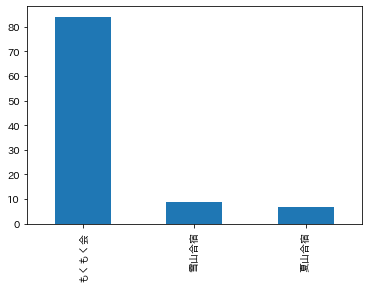

In [56]:
type_counts.plot(kind='bar')

## 天気

曇り（薄曇り含む）が多い。ただし、気象用語の定義は実感とは異なるようなので、晴れていると感じても分類上は「薄曇り」である可能性がある。

In [57]:
pyhack.weather.value_counts()

曇り          30
薄曇り         27
晴れ          25
多湿及び曇り       5
多湿及び薄曇り      5
霧雨の可能性あり     2
小雨の可能性あり     2
小雨           2
霧雨           1
多湿           1
Name: weather, dtype: int64

## 会場

会場名の文字列を整形していないので、表記揺れが別々にカウントされている。例えば、マウンテンパパは本来は16回である。

In [58]:
pyhack.place.value_counts()

ビープラウド会議室                                            52
ペンション マウンテンパパ                                        15
アリエル・ネットワーク 会議室                                      11
株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階)         7
アリエル・ネットワーク 会議室(黒崎ビル6階)                               6
六本木ヒルズ森タワー グリー株式会社 14F                                2
Nexedi                                                2
株式会社gumi 大会議室(パシフィックマークス新宿パークサイド7階)                   1
アリエル・ネットワーク                                           1
菅平(峰の原) マウンテンパパ(無線LANあり)                              1
    株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階)     1
フューチャーアーキテクト                                          1
Name: place, dtype: int64

住所の方が表記揺れは少ない。

In [59]:
pyhack.address.value_counts()

渋谷区千駄ヶ谷5-32-7 野村不動産南新宿ビル4F     46
長野県須坂市大字仁礼峰の原高原3153-720        16
東京都新宿区西新宿4丁目15番7号               9
東京都港区六本木4-1-4                   6
渋谷区千駄ヶ谷5-32-7(NOF南新宿ビル4F)       6
東京都港区虎ノ門3-4-7 (虎ノ門36森ビル 7階)     6
東京都港区虎ノ門3-4-7 虎ノ門36森ビル 7階       5
台東区浅草橋5-4-5 ハシモトビル7階            2
東京都港区六本木6-10-1                  2
東京都品川区大崎1-2-2                   1
東京都港区虎ノ門3-4-7(虎ノ門36森ビル7階)       1
Name: address, dtype: int64

緯度経度は桁数を揃えれば、一意にカウントできそうだが、一部は取得元が異なるせいか同じ住所でも若干のズレがある模様。

In [60]:
pd.Series(pyhack.lat + '-'+ pyhack.lon).value_counts()

35.686435500000-139.703531200000    46
36.553117300000-138.349743600000    15
35.6889375-139.6882207               9
35.666208600000-139.746843800000     7
35.665533400000-139.735825400000     6
35.686402100000-139.703513600000     6
35.666164600000-139.746801400000     5
35.6995556-139.7807378               2
35.660400500000-139.729042800000     2
35.622307800000-139.727330300000     1
36.5531173-138.3497436               1
dtype: int64

## 日付

月日をカウントすると偏りはないが、合宿の開催される冬場と7月には複数回開催された日がある。

In [61]:
pyhack.started_at.dt.strftime('%m月%d日').value_counts()

01月22日    2
03月23日    2
08月11日    2
02月16日    2
06月22日    2
07月13日    2
01月18日    2
07月09日    2
07月14日    2
10月27日    1
02月18日    1
03月12日    1
10月23日    1
05月21日    1
05月19日    1
11月16日    1
10月07日    1
04月07日    1
04月06日    1
03月29日    1
11月26日    1
12月12日    1
11月22日    1
08月01日    1
09月02日    1
11月12日    1
04月12日    1
01月30日    1
03月25日    1
05月24日    1
         ..
09月04日    1
11月11日    1
04月20日    1
05月27日    1
05月09日    1
08月06日    1
08月30日    1
06月11日    1
05月14日    1
01月17日    1
06月23日    1
02月13日    1
10月20日    1
01月20日    1
02月22日    1
06月25日    1
02月25日    1
12月02日    1
04月23日    1
06月09日    1
09月23日    1
02月17日    1
06月14日    1
01月19日    1
04月14日    1
08月10日    1
09月25日    1
03月24日    1
09月29日    1
06月17日    1
Name: started_at, Length: 91, dtype: int64

月別に見ると9月がやや少ない（6回）。

In [62]:
pyhack.started_at_month.value_counts().sort_index()

1     9
2     9
3     9
4     9
5     9
6     8
7     8
8     9
9     6
10    8
11    8
12    8
Name: started_at_month, dtype: int64

2012年から2014年までは9月に開催されていなかったためと思われる（一方、2012年と2013年は8月に2回）。

In [63]:
pd.pivot_table(pyhack, values='number', index=['started_at_year'], columns=['started_at_month'],
               aggfunc=len, fill_value=0, margins=True)

started_at_month,1,2,3,4,5,6,7,8,9,10,11,12,All
started_at_year,,,,,,,,,,,,,
2010,0,0,0,0,0,0,0,0,1,1,1,0,3
2011,1,1,1,1,1,1,1,0,1,1,1,1,11
2012,1,1,1,1,1,1,1,2,0,1,1,1,12
2013,1,1,1,1,1,1,1,2,0,1,1,1,12
2014,1,1,1,1,1,1,1,1,0,1,1,1,11
2015,1,1,1,1,1,0,1,1,1,0,1,1,10
2016,1,1,1,1,1,1,1,1,1,1,1,1,12
2017,1,1,1,1,1,1,1,1,1,1,1,1,12
2018,1,1,1,1,1,1,1,1,1,1,0,1,11


日だけをカウントすると、22日が最多で月の中頃が多い模様（週末開催なので月の両端にはなりにくい？）。

In [64]:
pyhack.started_at_day.value_counts().sort_index()

1     2
2     2
3     1
4     2
5     2
6     2
7     3
8     1
9     5
10    3
11    6
12    5
13    3
14    6
15    1
16    3
17    6
18    4
19    3
20    5
21    3
22    8
23    6
24    2
25    5
26    2
27    2
28    1
29    3
30    2
31    1
Name: started_at_day, dtype: int64

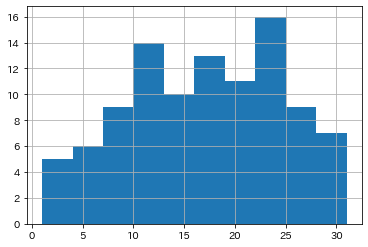

In [65]:
pyhack.started_at_day.hist()

## 記念日（○○の日）

同じ日に複数の記念日が設定されている。

In [66]:
pyhack.catch

0                               松本楼でチャリティー10円カレーセールの日
1                                          霜降、電信電話記念日
2                     世界の子どもの日、毛皮の日(いいファー)、えびす講、ピザの日 
3                                   飛行船の日、ジャズの日、カレーの日
4                                夕刊紙の日、二・二六事件の日、新選組の日
5                                       バングラデシュの独立記念日
6                                   サン・ジョルディの日、地ビールの日
7                                         種痘記念日、温度計の日
8                                                 傘の日
9                                         ジェットコースターの日
10                                         モノレール開業記念日
11                                             平安遷都の日
12                                        ペンの日、いい風呂の日
13                                          将棋の日、蓮根の日
14                                      大寒、ライバルが手を結ぶ日
15                                         節分、立春、笑顔の日
16                                                檸檬忌
17                         東南アジア・南アジアの正月、オレンジデー、SOSの日
18                          

「、」で切り分けて数える。

In [67]:
pd.Series(re.sub('\([^\(\)]+\)', '', '、'.join(pyhack.catch)).split('、')).value_counts()

玉の輿の日            3
野菜の日             3
冒険家の日            2
カレーの日            2
世界気象デー           2
カラオケの日           2
将棋の日             2
ジャズの日            2
ジェットコースターの日      2
ライバルが手を結ぶ日       2
都バスの日            2
ひまわりの日           2
道の日              2
空気清浄機の日          2
駅弁記念日            2
宝くじの日            2
北極の日             1
煮干しの日            1
テディベアズ・デー        1
北壁の日             1
水戸の日             1
ボウリングの日          1
ドイツ統一の日          1
ゼリーの日            1
シーラカンスの日         1
漫画の日             1
ゴクゴクの日           1
東南アジア・南アジアの正月    1
笑顔の日             1
バレンタインデーイブ       1
                ..
石炭の日             1
ボクシングの日          1
118番の日           1
コンビニATMの日        1
世界人権デー           1
イーサン・ハントの日       1
漢字の日             1
温度計の日            1
傘の日              1
映画の日             1
平安遷都の日           1
きのこの山の日          1
新選組の日            1
いい風呂の日           1
ペンの日             1
名字の日             1
二・二六事件の日         1
花火の日             1
回文の日             1
立春               1
大寒               1
節分          

「玉の輿の日」（という記念日を作るのはどうかと思うが）と「野菜の日」を確認すると、合宿の期間中に該当したため他より多くなったらしい。

In [68]:
pyhack.loc[pyhack.catch.apply(lambda x: re.search('玉の輿の日', x) != None)]

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type,weather,filled
26,https://pyhack.connpass.com/event/1308/,takanori,2014-06-30 10:06:31+09:00,36.553117300000,2013-01-18 13:00:00+09:00,Python mini hack-a-thon 雪山合宿 2013,1308,138.349743600000,0,22,...,20,2013-01-20 16:00:00+09:00,ペンション マウンテンパパ,2013,1,18,27,雪山合宿,晴れ,0.909091
71,https://pyhack.connpass.com/event/43864/,takanori,2017-01-20 12:50:17+09:00,36.553117300000,2017-01-20 13:00:00+09:00,Python mini hack-a-thon 雪山合宿 2017,43864,138.349743600000,0,25,...,24,2017-01-22 15:00:00+09:00,ペンション マウンテンパパ,2017,1,20,72,雪山合宿,晴れ,0.960000
94,https://pyhack.connpass.com/event/104809/,takanori,2019-01-09 18:34:49+09:00,36.553117300000,2019-01-18 13:00:00+09:00,Python mini hack-a-thon 雪山合宿 2019,104809,138.349743600000,0,29,...,29,2019-01-20 15:00:00+09:00,ペンション マウンテンパパ,2019,1,18,95,雪山合宿,薄曇り,1.000000


In [69]:
pyhack.loc[pyhack.catch.apply(lambda x: re.search('野菜の日', x) != None)]

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type,weather,filled
22,https://pyhack.connpass.com/event/509/,takanori,2014-10-16 13:29:43+09:00,36.553117300000,2012-08-31 13:00:00+09:00,Python mini hack-a-thon 夏山合宿 2012,509,138.349743600000,0,22,...,19,2012-09-02 14:00:00+09:00,ペンション マウンテンパパ,2012,8,31,23,夏山合宿,晴れ,0.863636
34,https://pyhack.connpass.com/event/2651/,takanori,2014-06-30 10:06:50+09:00,36.553117300000,2013-08-30 13:00:00+09:00,Python mini hack-a-thon 夏山合宿 2013,2651,138.349743600000,0,25,...,21,2013-09-01 14:00:00+09:00,ペンション マウンテンパパ,2013,8,30,35,夏山合宿,晴れ,0.840000
45,https://pyhack.connpass.com/event/6437/,takanori,2014-07-02 14:44:03+09:00,36.553117300000,2014-08-29 13:00:00+09:00,Python mini hack-a-thon 夏山合宿 2014,6437,138.349743600000,0,20,...,15,2014-08-31 14:00:00+09:00,ペンション マウンテンパパ,2014,8,29,46,夏山合宿,晴れ,0.750000


その他、気になる人がいそうな記念日を調べてみる。

In [70]:
pyhack.loc[pyhack.catch.apply(lambda x: re.search('カレーの日', x) != None)]

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type,weather,filled
3,http://atnd.org/events/10194,takanori,2011-01-19 14:04:08+09:00,35.6889375,2011-01-22 11:00:00+09:00,(第4回)Python mini Hack-a-thon,10194,139.6882207,0,30,...,12,2011-01-22 19:00:00+09:00,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),2011,1,22,4,もくもく会,薄曇り,0.4
59,https://pyhack.connpass.com/event/19902/,takanori,2015-10-16 16:27:56+09:00,36.553117300000,2016-01-22 13:00:00+09:00,Python mini hack-a-thon 雪山合宿 2016,19902,138.349743600000,0,25,...,20,2016-01-24 16:00:00+09:00,ペンション マウンテンパパ,2016,1,22,60,雪山合宿,晴れ,0.8


In [71]:
pyhack.loc[pyhack.catch.apply(lambda x: re.search('地ビールの日', x) != None)]

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type,weather,filled
6,http://atnd.org/events/14178,takanori,2011-03-28 13:54:30+09:00,35.6889375,2011-04-23 11:00:00+09:00,(第7回)Python mini Hack-a-thon,14178,139.6882207,0,30,...,21,2011-04-23 19:00:00+09:00,株式会社gumi gumeeting room(パシフィックマークス新宿パークサイド7階),2011,4,23,7,もくもく会,小雨,0.7


In [72]:
pyhack.loc[pyhack.catch.apply(lambda x: re.search('世界ビールの日', x) != None)]

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type,weather,filled
78,https://pyhack.connpass.com/event/60269/,takanori,2017-07-14 14:50:45+09:00,35.686435500000,2017-08-05 11:00:00+09:00,(第79回)Python mini Hack-a-thon,60269,139.703531200000,5,20,...,20,2017-08-05 19:00:00+09:00,ビープラウド会議室,2017,8,5,79,もくもく会,多湿及び薄曇り,1.0


In [73]:
pyhack.loc[pyhack.catch.apply(lambda x: re.search('クラシック音楽の日', x) != None)]

,event_url,owner_nickname,updated_at,lat,started_at,title,event_id,lon,waiting,limit,...,accepted,ended_at,place,started_at_year,started_at_month,started_at_day,number,type,weather,filled
56,https://pyhack.connpass.com/event/15008/,takanori,2015-09-02 09:37:48+09:00,36.553117300000,2015-09-04 13:00:00+09:00,Python mini hack-a-thon 夏山合宿 2015,15008,138.349743600000,0,25,...,25,2015-09-06 14:00:00+09:00,ペンション マウンテンパパ,2015,9,4,57,夏山合宿,晴れ,1.0


今日（6月22日）は何の日？
* https://twitter.com/yutakanzawa/status/1142287988715425792

In [74]:
pyhack.loc[pyhack.started_at.dt.strftime('%Y-%m-%d') == '2019-06-22', 'catch']

99    かにの日
Name: catch, dtype: object

## 参加者数

In [75]:
pyhack.accepted

0      9
1      7
2     14
3     12
4      7
5     22
6     21
7     18
8     23
9     26
10    24
11    23
12    26
13    24
14    26
15    13
16    28
17    27
18    24
19    29
20    17
21    20
22    19
23    27
24    15
25    14
26    20
27    25
28    20
29    20
      ..
70    20
71    24
72    20
73    20
74    20
75    20
76    20
77    21
78    20
79    20
80    20
81    20
82    17
83    27
84    20
85    20
86    20
87    20
88    20
89    25
90    20
91    20
92    17
93    20
94    29
95    18
96    20
97    15
98    20
99    20
Name: accepted, Length: 100, dtype: int64

これをグラフにする。

In [76]:
# カラーマップ
colmap = plt.cm.get_cmap('winter')

In [77]:
# 合宿を表すフラグ
camp_idx = pyhack.type.isin(['夏山合宿', '雪山合宿'])

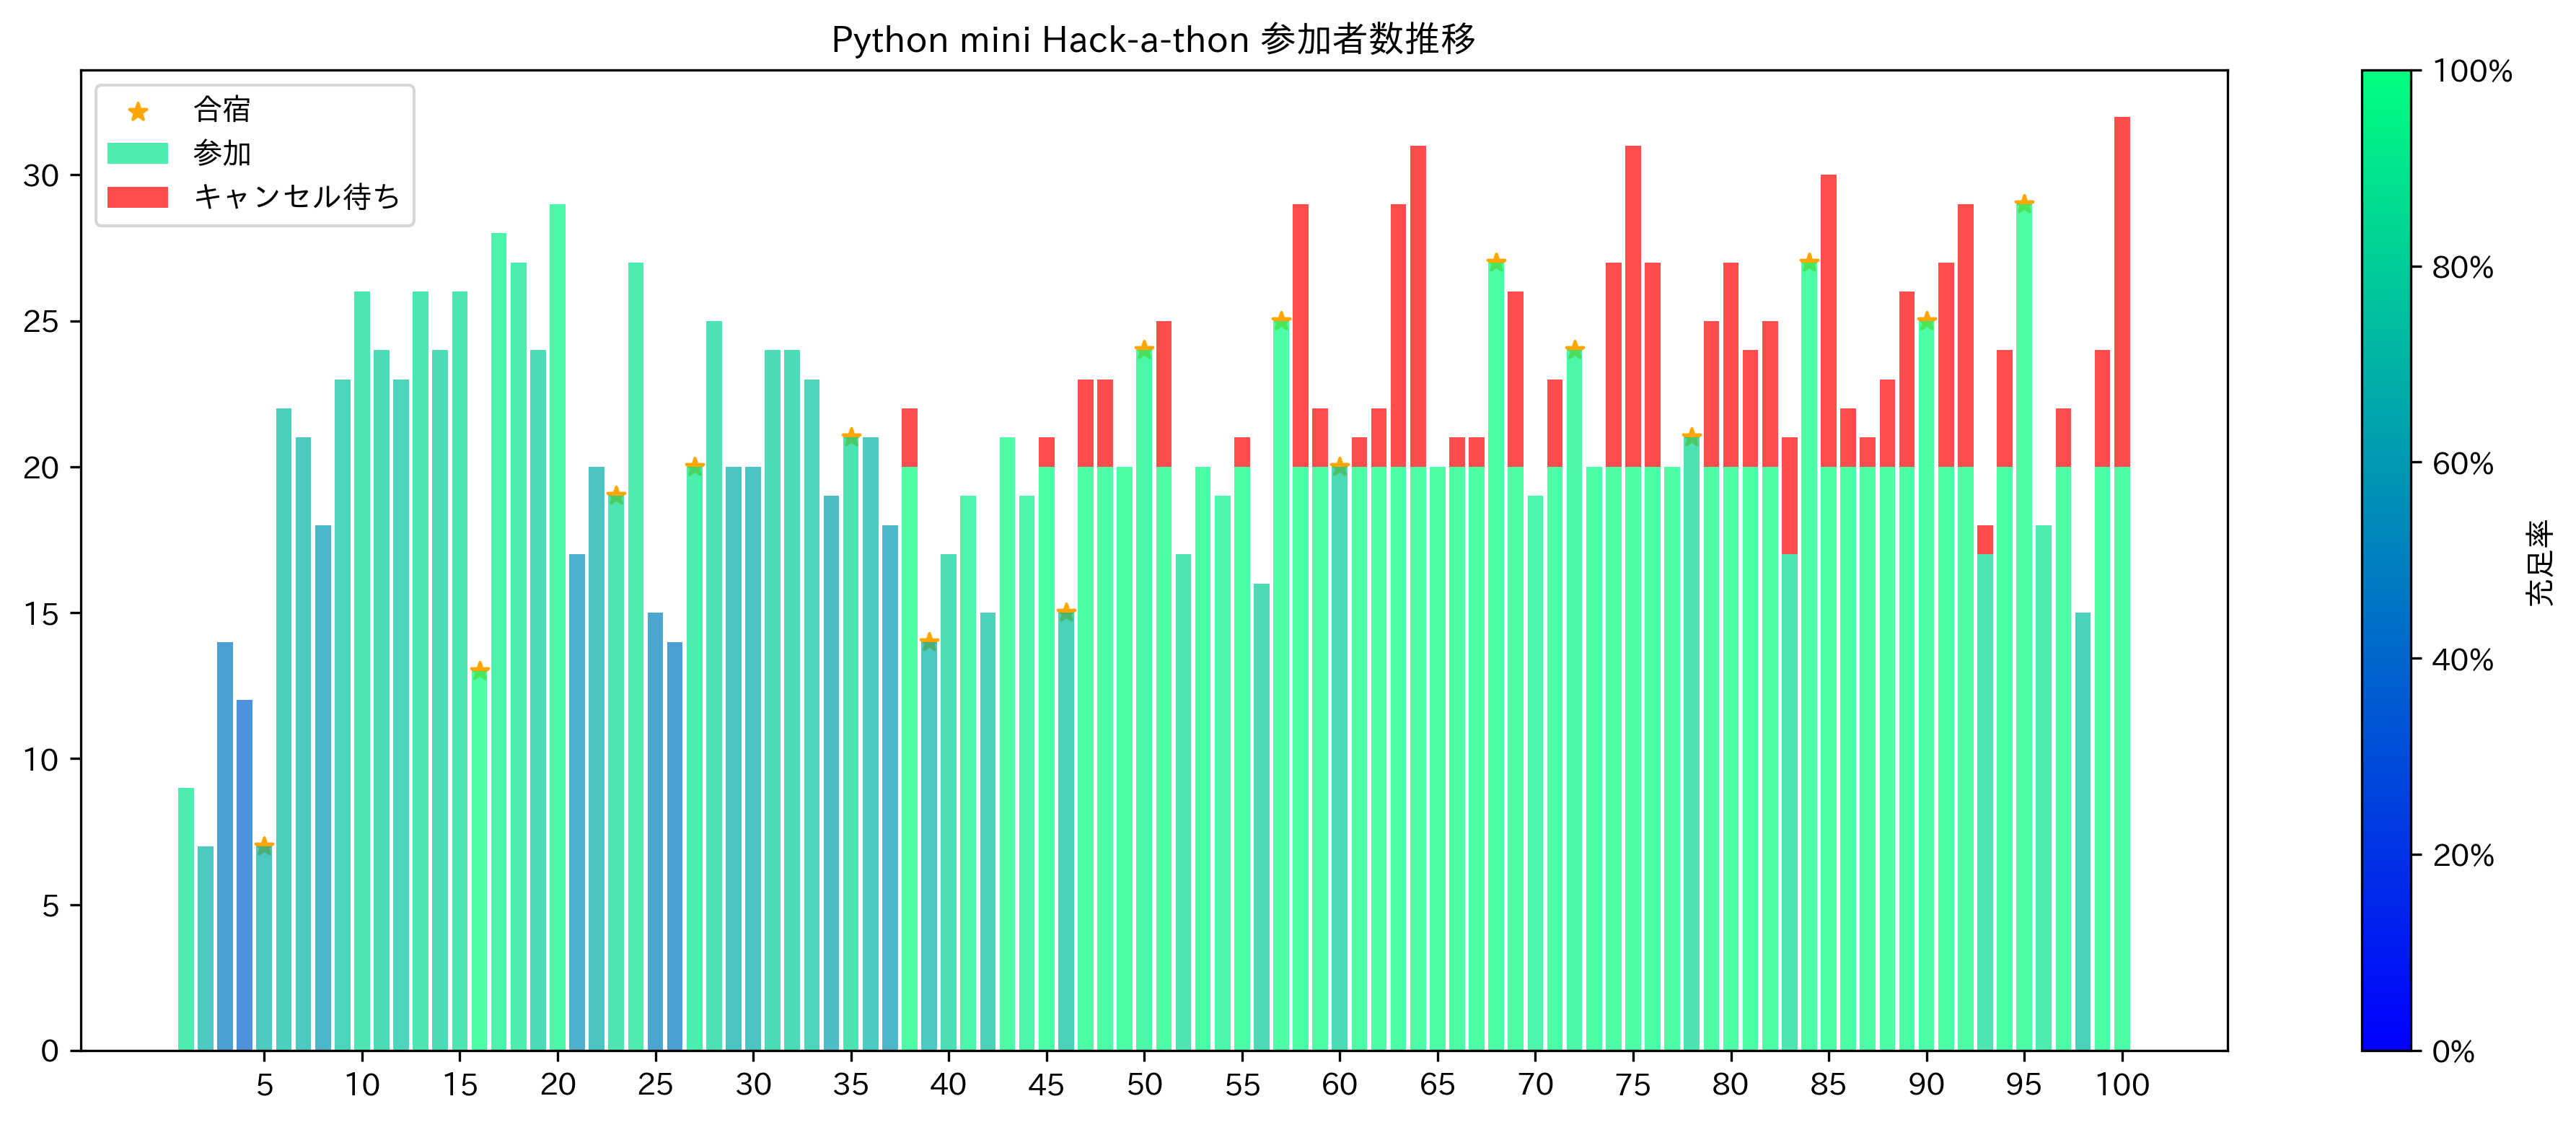

In [78]:
fig = plt.figure(figsize=(16,6), dpi=300)
ax = fig.add_subplot(111)
# 棒グラフを描く。
ax.bar(x=pyhack.index, height=pyhack.accepted,
       color=[colmap(x) for x in pyhack.filled], alpha=0.7, label='参加')  # バーの色は充足率を表す。
ax.bar(x=pyhack.index, height=pyhack.waiting,
       bottom=pyhack.accepted, color='red', alpha=0.7, label='キャンセル待ち')  # 参加者の上にキャンセル待ちを乗せる。
ax.scatter(x=pyhack.index[camp_idx], y=(pyhack.accepted+pyhack.waiting)[camp_idx],
           marker='*', color='orange', label = '合宿')  # 合宿の回にマークを付ける。
plt.xticks(np.arange(4,100,5), np.arange(4,100,5)+1)
plt.title('Python mini Hack-a-thon 参加者数推移')
ax.legend()
# 凡例のカラーバーを表示させる。
plt.scatter(x=pyhack.index, y=pyhack.accepted,
            c=pyhack.filled, cmap='winter', s=0, vmin=0, vmax=1)  # ダミー（サイズ0）
cbar = plt.colorbar()
cbar.set_label('充足率')
cbar_ticks = [str(int(float(t * 100)))+'%' for t in cbar.get_ticks()]
cbar.ax.set_yticklabels(cbar_ticks)
plt.show()

第55回以降はほぼ毎回キャンセル待ちが発生している。

In [79]:
# TODO: Bokehを用いて上のグラフをインタラクティヴにする。

# まとめ
第100回にてもくもくした成果をLTとして当日発表したところ好評を得た。ノートブックの仕上げと公開は第101回の夏山合宿になってしまったが、「歴史」をデータで示すことができ、当日のもくもくとその後の追加作業を含めて学ぶことが多かった。  
このようなイベントを継続して開催されている運営の方々には感謝しかない。これからもできる限り参加して、楽しくもくもくしていきたい。今後ともよろしくお願いします！